# General Information

This is the final project for Coursera course "Applied Plotting, Charting & Data Representation in Python". This document gives some information about the project and describes my decisions in data processing and design. Also, at the end it contains the source code for provided visualization.

**DISCLAIMER:** This is just a project for the course. No liability accepted. Use at your own risk. 

# Project Topic
The assigned topic was **"weather phenomena for the region of Luxembourg"**. The choice of topic was not really enforced, and it is not a part of a grading criteria whether the project follows the assigned topic strictly. However, I decided to follow the assigned topic - in data science the choice of questions does not usually belong to data scientists themselves. And, yet, such a broad topic gives some freedom about the questions to be asked.

Luxembourg is quite a rainy place, so I thought of the following question: **Is Luxembourg the rainiest place in Europe?** Spoiler: not even close.

# Target Audience
The project is directed at non-professionals. No experience in meteorology and climatology is necessary. And only minimal chart reading literacy is required (e.g. the ability to read a box plot). Therefore, I chose infographics-style visualization common in popular science journals: plots (as readable as possible), combined with textual explanation of key concepts.

<TODO:> A4 (or A5?)

# Data Sources
The requirement for the course was to use at least 2 data sources. I used a bit more:
- **Source 1:** Long-term average annual precipitation in depth  (mm/year), collected by United Nations Food and Agriculturre Administration (FAO). It is available [here](http://www.fao.org/nr/water/aquastat/data/query/results.html?regionQuery=true&yearGrouping=SURVEY&yearRange.fromYear=1960&yearRange.toYear=2015&varGrpIds=4151&regIds=9808&includeRegions=true&showValueYears=true&categoryIds=-1&XAxis=YEAR&showSymbols=true&showUnits=true&hideEmptyRowsColoumns=false&_hideEmptyRowsColoumns=off&lang=en&query_type=glossary). The list of countries in Europe was taken from the same source.

I copied the table, and used Python script to parse the data. Unfortunately, this table gives only long term average over many years (and a bit misleadingly copies the value for each year), so I used other data sources for time information. For seven European countries the data are missing: Andorra, Liechtenstein, Monaco, Montenegro, Vatican, San Marino, Serbia.

[World Bank](https://data.worldbank.org/indicator/AG.LND.PRCP.MM)  and ([www.theglobaleconomy.com](https://www.theglobaleconomy.com/rankings/precipitation/European-union/)) provide mostly the same data as FAO and explicitly credit FAO as the source. However, there are some weird discrepancies. For example, according to their records Liechtenstein (missing in FAO data), very small country bordering very rainy Austria and Switzerland, suddenly becomes one of the driest places on Earth. Also, the record for Slovakia in 1992 is extremely large, almost three times larger than other records for that country. However, in FAO there is no record like that. Also, by design of the FAO dataset there should be only one value per country - the value averaged for all years of observation, and then for the country it is replicated for all the years in the table. The record for Montenegro (missing in FAO data) is supiciously similar to the neighboring line of Mongolia. And there might be more.
Therefore, given suspicious inconsistencies in WorldBank/Globaleconomy version of data, I explicitly decided to stick with FAO data only. 

# Chart I. Rainiest Countries of Europe
<TODO:>

## Truthfulness
<TODO:>
The measured "mm per second" is a standard measure.

TODO: Barplot is great for comparison

## Beauty
I worked with the fonts and positioning to 

## Insightfulness
<TODO:> The data do answer the question, and the plot .

Comaprison - intentionally not using a map.


In [332]:
import requests
import re
fao_url = "http://www.fao.org/nr/water/aquastat/data/query/results.html?regionQuery=true&yearGrouping=SURVEY&yearRange.fromYear=1960&yearRange.toYear=2015&varGrpIds=4151&regIds=9808&includeRegions=true&showValueYears=true&categoryIds=-1&XAxis=YEAR&showSymbols=true&showUnits=true&hideEmptyRowsColoumns=false&_hideEmptyRowsColoumns=off&lang=en&query_type=glossary"

fao_result = requests.get(fao_url)
# For some reason beautifulsoup fails to parse this table (terminated early, despite fao_result.content looking good).
# Have to resort to regex.
html_table_str = "<table" + re.findall('<table(.*?)</table>',str(fao_result.content))[0] + "</table>"

rename_dict = {
    "Unnamed: 0" : "Country",
    "2013-2017" : "Precipitation"
}

non_countries = ["World | Europe","Faroe Islands"] # Faroes are part of Denmark (and there is no data anyway)

fao_data = (pd.read_html(html_table_str)[0][rename_dict.keys()]
           .rename(rename_dict, axis=1)
           .set_index("Country")
           .drop(non_countries, axis=0)
           .reset_index())
# Ints do not have NaNs. Have to use float.
fao_data["Precipitation"] = fao_data["Precipitation"].apply(lambda x:
        None if x == 'NaN' else re.sub('E{0,1}\([0-9]*\)','', str(x)).replace(' ', '')).astype(float)
fao_data

,Country,Precipitation
0,Albania,1485.0
1,Andorra,NaN
2,Austria,1110.0
3,Belarus,618.0
4,Belgium,847.0
5,Bosnia and Herzegovina,1028.0
6,Bulgaria,608.0
7,Croatia,1113.0
8,Cyprus,498.0
9,Czechia,677.0


In [515]:
from bs4 import BeautifulSoup

country_areas_url = "http://en.wikipedia.org/wiki/List_of_European_countries_by_area"
country_areas_result = requests.get(country_areas_url)

rename_columns = {"Total area (km\\xc2\\xb2)\\n":"AreaKM2", "State\\n":"Country"}
ca_bs = BeautifulSoup(str(country_areas_result.content), 'html.parser')
country_areas_ds = (pd.read_html(str(ca_bs.find('table', {'class' : 'wikitable'})))[0][rename_columns.keys()]
                      .rename(rename_columns, axis=1))

for c in country_areas_ds.columns:
    country_areas_ds[c] = country_areas_ds[c].apply(lambda x: x[:-3] if "*" in x else x[:-2])

country_areas_ds["AreaM2"] = country_areas_ds["AreaKM2"].apply(lambda x: float(x.replace(',',''))*(10**6))
country_areas_ds = country_areas_ds.drop("AreaKM2", axis=1)
country_areas_ds.loc[country_areas_ds["Country"] == "Moldova", "Country"] = "Republic of Moldova"
country_areas_ds.loc[country_areas_ds["Country"] == "Russia", "AreaM2"] = 17098242*10**6
# Have to use the entire area, not just European part
country_areas_ds.loc[country_areas_ds["Country"] == "Russia", "Country"] = "Russian Federation"
# It strongly looks like the total volume of Cyprus is counted without the rainfall on Northern Cyprus
# 
country_areas_ds.loc[country_areas_ds["Country"] == "Cyprus", "AreaM2"] -= 3355000000
country_areas_ds

,Country,AreaM2
0,Russian Federation,1.709824e+13
1,Ukraine,6.036280e+11
2,France,5.516950e+11
3,Spain,4.985110e+11
4,Sweden,4.502950e+11
5,Norway,3.851780e+11
6,Germany,3.573860e+11
7,Finland,3.381450e+11
8,Poland,3.126850e+11
9,Italy,3.013380e+11


In [516]:
# TODO read UN data in volume in the same manner?
un_data = (pd.read_csv("UNdata_Export_20200831_203540647/UNdata_Export_20200831_203540647.csv", nrows=1711)
            .rename({"Country or Area" : "Country", "Value" : "VolumeMilM3"}, axis=1)) # We will remove areas soon
un_data = un_data[un_data["Country"].isin(fao_data["Country"])][["Country","Year","VolumeMilM3"]]
un_data

,Country,Year,VolumeMilM3
0,Albania,2015,32711.000000
1,Albania,2014,37172.000000
2,Albania,2013,30615.000000
3,Albania,2012,28058.000000
4,Albania,2011,30569.000000
...,...,...,...
1562,Switzerland,1994,72806.898438
1563,Switzerland,1993,69391.398438
1564,Switzerland,1992,57787.000000
1565,Switzerland,1991,59231.000000


In [517]:
un_depth_estimation = pd.merge(un_data, country_areas_ds, how='left', left_on='Country', right_on='Country')
# Multiplying by 10^6 because of _millions_ of cubic meters, then multiplying by 10^3 to get millimeters. 
un_depth_estimation["DepthMM"] = un_depth_estimation["VolumeMilM3"]*(10**9) / un_depth_estimation["AreaM2"]
un_depth_estimation

,Country,Year,VolumeMilM3,AreaM2,DepthMM
0,Albania,2015,32711.000000,2.874800e+10,1137.853068
1,Albania,2014,37172.000000,2.874800e+10,1293.029080
2,Albania,2013,30615.000000,2.874800e+10,1064.943648
3,Albania,2012,28058.000000,2.874800e+10,975.998330
4,Albania,2011,30569.000000,2.874800e+10,1063.343537
...,...,...,...,...,...
760,Switzerland,1994,72806.898438,4.129000e+10,1763.305847
761,Switzerland,1993,69391.398438,4.129000e+10,1680.586060
762,Switzerland,1992,57787.000000,4.129000e+10,1399.539840
763,Switzerland,1991,59231.000000,4.129000e+10,1434.511988


In [518]:
un_depth_estimation["Country"].unique()

array(['Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium',
       'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus',
       'Czechia', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany',
       'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia', 'Lithuania',
       'Luxembourg', 'Malta', 'Monaco', 'Netherlands', 'Norway', 'Poland',
       'Portugal', 'Republic of Moldova', 'Romania', 'Russian Federation',
       'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland'],
      dtype=object)

In [519]:
np.sum(un_depth_estimation["DepthMM"].isna())

0

In [520]:
un_depth_estimation[un_depth_estimation["Country"] == 'Russian Federation']

,Country,Year,VolumeMilM3,AreaM2,DepthMM
596,Russian Federation,2013,10960192.0,1.709824e+13,641.012801
597,Russian Federation,2012,10213529.0,1.709824e+13,597.343809
598,Russian Federation,2011,9497691.0,1.709824e+13,555.477633
599,Russian Federation,2010,9853898.0,1.709824e+13,576.310594
600,Russian Federation,2009,10052551.0,1.709824e+13,587.928923
601,Russian Federation,2008,10062826.0,1.709824e+13,588.529862
602,Russian Federation,2007,10028576.0,1.709824e+13,586.526732
603,Russian Federation,2006,10139890.0,1.709824e+13,593.036992
604,Russian Federation,2005,9632981.0,1.709824e+13,563.390143
605,Russian Federation,2004,10443008.0,1.709824e+13,610.765013


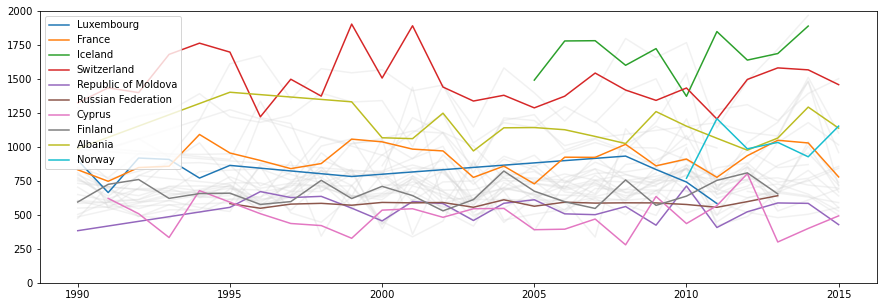

In [523]:
plt.gcf().set_size_inches(15,5)

interesting_countries = ["Luxembourg","France","Iceland","Switzerland","Republic of Moldova","Russian Federation",
                        "Cyprus","Finland","Albania","Norway"]
#interesting_countries = un_depth_estimation["Country"].unique()

for i in un_depth_estimation["Country"].unique():
    if i not in interesting_countries:
        cur_country = un_depth_estimation[un_depth_estimation["Country"] == i]
        plt.plot(cur_country["Year"], cur_country["DepthMM"], color='lightgray',alpha=0.3)

legend_list = list()
plot_list = list()
for i in interesting_countries:
    cur_country = un_depth_estimation[un_depth_estimation["Country"] == i]
    plt.plot(cur_country["Year"], cur_country["DepthMM"], label=i)
    
plt.ylim(0,2000)
plt.legend()
plt.show()

# Part II. Plots.

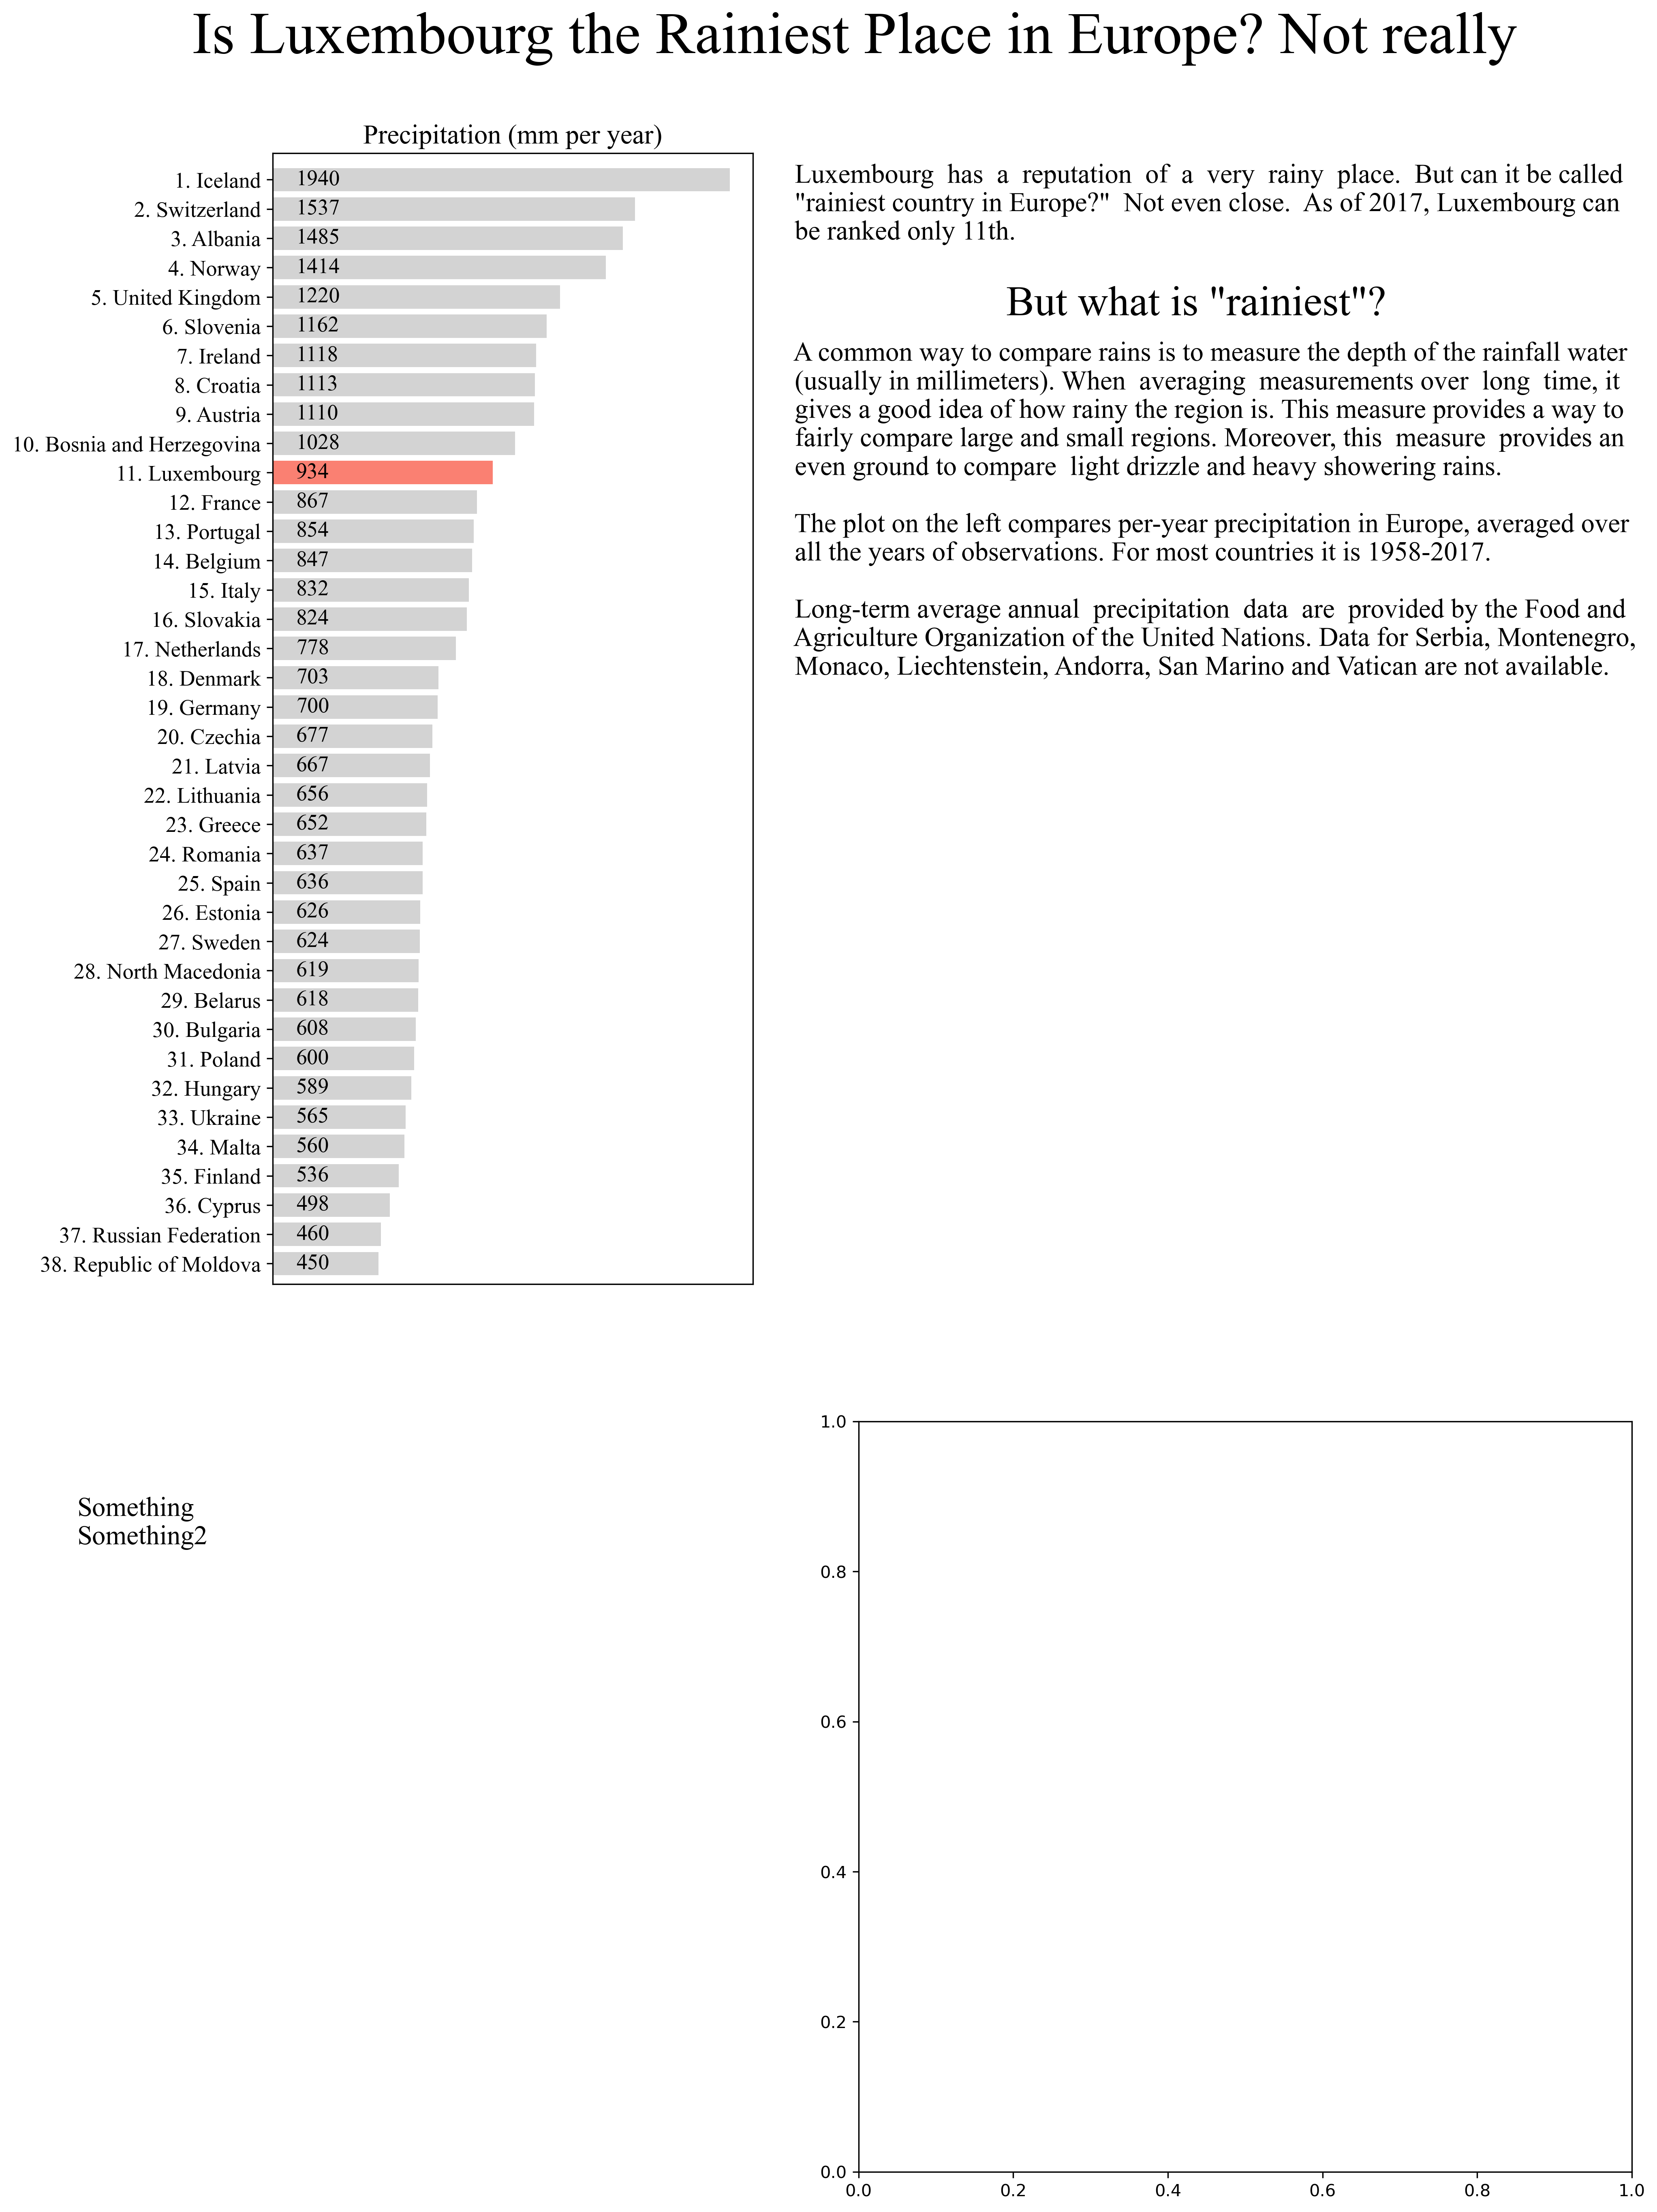

In [417]:
# TODO: add the description of how the rain is measured. Add one more text field in the beginning? Reference the figures
# (TeX style)?

# TODO: Why horizontal barplot? Why not a map? Add to README and to project description. Actually, add everything:
# choice of plots, criteria, etc.

# TODO: Adding ranks to country names was the most difficult decision. Still the least of evils, though.

# TODO: Truthfulness - I acknowledged the problems honestly.

# TODO Explicitly add the data to README (first line if needs be)

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.font_manager import FontProperties

%matplotlib inline

def prepare_text_axes(ax):
    ax.set_axis_off()
    ax.set_xlim(-1,1)
    ax.set_ylim(-1,1)

normal_font_properties = FontProperties()
normal_font_properties.set_family('serif')
normal_font_properties.set_name('Times New Roman')
normal_font_properties.set_size(16)

smaller_normal_font_properties = FontProperties()
smaller_normal_font_properties.set_family('serif')
smaller_normal_font_properties.set_name('Times New Roman')
smaller_normal_font_properties.set_size(13)

header_font_properties = FontProperties()
header_font_properties.set_family('serif')
header_font_properties.set_name('Times New Roman')
header_font_properties.set_size(35)
header_font_properties.set_weight('bold')

header2_font_properties = FontProperties()
header2_font_properties.set_family('serif')
header2_font_properties.set_name('Times New Roman')
header2_font_properties.set_size(25)
header2_font_properties.set_weight('bold')

gspec = gridspec.GridSpec(34,32) # Very fine-grained grid

f = plt.figure(dpi=300)
f.set_size_inches(16.5, 23.375)

suptitle_axes = plt.subplot(gspec[0,:])
prepare_text_axes(suptitle_axes)
suptitle_axes.text(0,0,"Is Luxembourg the Rainiest Place in Europe? Not really",
                   font_properties=header_font_properties, horizontalalignment='center')

# Section: total comparison plot
fao_target = "Precipitation"
# TODO: determine Luxembourg position automatically
comparison_plot_axes = plt.subplot(gspec[2:20,4:14])
# Looks like horizontal barplot is built from bottom to top. No worries, just need to keep it in mind
sorted_fao = fao_data[~fao_data[fao_target].isna()].sort_values(by = [fao_target])
colorvec = ['lightgray']*len(sorted_fao)
colorvec[np.where(sorted_fao["Country"] == "Luxembourg")[0][0]] = 'salmon'
bars = comparison_plot_axes.barh(
    [str(len(sorted_fao) - i) +'. ' + sorted_fao["Country"].iloc[i] for i in range(len(sorted_fao["Country"]))],
    sorted_fao[fao_target],
    color=colorvec)
comparison_plot_axes.set_title("Precipitation (mm per year)",
                               font_properties=normal_font_properties)

for i in range(len(bars)):
    comparison_plot_axes.text(100,i,str(int(sorted_fao.iloc[i][fao_target])),
                horizontalalignment='left', verticalalignment='center', font_properties=smaller_normal_font_properties)
    comparison_plot_axes.yaxis.get_majorticklabels()[i].set_font_properties(smaller_normal_font_properties)
comparison_plot_axes.set_xticks([])
comparison_plot_axes.set_ylim(-0.7, len(sorted_fao)-0.1)

for i in comparison_plot_axes.xaxis.get_majorticklabels():
    i.set_font_properties(smaller_normal_font_properties)
    
# Section: 
time_plot_axes = plt.subplot(gspec[22:,16:])
time_text_axes = plt.subplot(gspec[22:,:16])

# Section:
comparison_text_axes = plt.subplot(gspec[3:20,14:])
prepare_text_axes(comparison_text_axes)
comparison_section_text = (
"""     Luxembourg  has  a  reputation  of  a  very  rainy  place.  But can it be called
     "rainiest country in Europe?"  Not even close.  As of 2017, Luxembourg can
     be ranked only 11th.
""")
comparison_text_axes.text(-1, 1.1, comparison_section_text, horizontalalignment='left', verticalalignment='top',
                    font_properties=normal_font_properties)

comparison_text_axes.text(0, 0.87, 'But what is "rainiest"?',
    horizontalalignment='center', verticalalignment='top', font_properties=header2_font_properties)

comparison_section_text2 = """
     A common way to compare rains is to measure the depth of the rainfall water
     (usually in millimeters). When  averaging  measurements over  long  time, it
     gives a good idea of how rainy the region is. This measure provides a way to
     fairly compare large and small regions. Moreover, this  measure  provides an
     even ground to compare  light drizzle and heavy showering rains.

     The plot on the left compares per-year precipitation in Europe, averaged over
     all the years of observations. For most countries it is 1958-2017.
     
     Long-term average annual  precipitation  data  are  provided by the Food and
     Agriculture Organization of the United Nations. Data for Serbia, Montenegro,
     Monaco, Liechtenstein, Andorra, San Marino and Vatican are not available.
"""
comparison_text_axes.text(-1, 0.82, comparison_section_text2,
    horizontalalignment='left', verticalalignment='top', font_properties=normal_font_properties)

prepare_text_axes(time_text_axes)
time_text_axes.text(-1,0.8,"Something\nSomething2", horizontalalignment='left', verticalalignment='top',
                    font_properties=normal_font_properties)

plt.show(f)
f.savefig('draft.pdf')

In [247]:
sorted_fao["Country"].iloc[0]

'France'

In [138]:
sorted_fao = data_fao.sort_values(by = [fao_target])
sorted_fao = (sorted_fao.iloc
    [-(len(sorted_fao) - np.where(sorted_fao["Country"] == "Luxembourg")[0][0] + num_to_show_after_lux):])
sorted_fao

,Country,Code,Precipitation mm per year
125,France,FRA,867
238,Luxembourg,LUX,934
137,Georgia,GEO,1026
54,Bosnia and Herzegovina,BIH,1028
18,Austria,AUT,1110
72,Croatia,HRV,1113
191,Ireland,IRL,1118
356,Slovenia,SVN,1162
291,Norway,NOR,1414
0,Albania,ALB,1485


In [401]:
comparison_section_text2

'\n     A common way to compare rains is to measure the depth of the rainfall water\n     (usually in millimeters). When  averaging  measurements  over long  time, it\n     gives a  good idea of how rainy the region is. This  measure provides a way to\n     fairly  compare  large  and  small  regions.  Moreover,  this   measure\n     provides an even ground to compare  light drizzle and heavy showering rains.\n\n     The plot on the left compares per-year  precipitation in Europe, averaged\n     over all the years of observations. For most countries it is 1958-2017.\n     \n     Long-term  average  annual  precipitation  data are  provided by Food and\n     Agriculture  Organization  (FAO)  of  United  Nations.  Data  for  Serbia, \n     Montenegro, Monaco, Liechtenstein, Andorra, San Marino and Vatican are not\n     available.\n'

In [204]:
a = comparison_plot_axes.yaxis.majorTicks[0]

In [242]:
ytl[0].get_text()

'France'

In [215]:
[str(i)+". " + str(ytl[i].get_text()) for i in range(len(ytl))]

['0. France',
 '1. Luxembourg',
 '2. Georgia',
 '3. Bosnia and Herzegovina',
 '4. Austria',
 '5. Croatia',
 '6. Ireland',
 '7. Slovenia',
 '8. Norway',
 '9. Albania',
 '10. Switzerland',
 '11. Iceland',
 '12. Slovakia']

In [229]:
new_labels

['0. ',
 '1. ',
 '2. ',
 '3. ',
 '4. ',
 '5. ',
 '6. ',
 '7. ',
 '8. ',
 '9. ',
 '10. ',
 '11. ',
 '12. ']

In [225]:
[str(i)+". " + str(ytl[i].get_text()) for i in range(len(ytl))]

['0. France',
 '1. Luxembourg',
 '2. Georgia',
 '3. Bosnia and Herzegovina',
 '4. Austria',
 '5. Croatia',
 '6. Ireland',
 '7. Slovenia',
 '8. Norway',
 '9. Albania',
 '10. Switzerland',
 '11. Iceland',
 '12. Slovakia']